In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Config')
from lablib import *

# Prima parte

## Circuito RC

Abbiamo effettuato le misurazioni con il cursore dell'oscilloscopio. \
**Resistenza interna oscilloscopio** = 50 $\Omega$

Capacita = 10 nF \
resistenza = 67.1 $k\Omega$ \
frequenza = 200 Hz \
incertezza su oscilloscopio (precisione strumento) = 8 mV


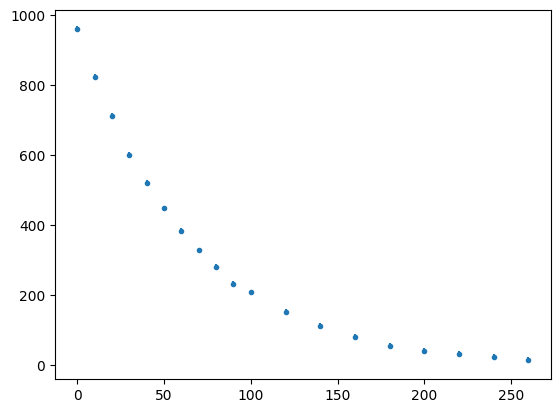

In [2]:
# Primo plot dei dati
dati1 = pd.read_csv("Dati1.csv")

tempi1 = dati1["tempo(carica)[ms]"]
carica1 = dati1["tensione(carica1)[mV]"]

plt.errorbar(tempi1, carica1, [8 for i in carica1], fmt = '.')
plt.show()

In [3]:
# prova fit dei dati con libreria
def mod(x, A, T):
    return A*np.exp(-x/T)

par, val, ers, *other = LS_fit(tempi1, carica1, [8 for i in carica1], mod, disp=1, A=1,T=1)

for p, v, e in zip(par, val, ers):
    print(f"{p} = {v:.3f} ± {e:.3f}")

for j in other:
    print(j)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.982 (χ²/ndof = 0.2)      │              Nfcn = 79               │
│ EDM = 1.33e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │    962    │     6     │            │            │         │         │       │
│ 1 │ T    │   64.8    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     A     T │
├───┼─────────────┤
│ A │  31.3  -2.4 │
│ T │  -2.4 0.406 │
└───┴─────────────┘

A = 962.243 ± 5.590
T = 64.769 ± 0.637
0.9999334209733226
17.0
2.9821132565773563
┌───┬─────────────┐
│   │     A     T │
├───┼─────────────┤
│ A │  31.3  -2.4 │
│ T │  -2.4 0.406 │
└───┴─────────────┘


## Circuito RL

induttanza circa 10 mH \
resistenza = 1 $k\Omega$ \
frequenza = 700 Hz \
range di tensione = -1,1 V \
precisione oscilloscopio = 20 mV

 # Seconda parte

## Circuito RLC

Resistenza = 300 $\Omega$ \
Induttanza e capacità uguali a prima

Abbiamo stimato le costanti del sistema prima di prendere i dati:
* $\omega_0$ = 100 kHz
* $f_0 = \frac{\omega_0}{2\pi}$ = 16kHz 

Ci siamo resi presto conto che questi risultati sono insensati \
Frequenza effettivamente usata = 300 Hz